In [153]:
import pandas as pd
import math
import numpy as np

In [154]:
def calculate_distance(x, X):
    X_copy = X.copy()
    distances = []
    for index, row in X_copy.iterrows():
        dist = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(x, row)]))
        distances.append(dist)
    X_copy['distance'] = distances
    return X_copy

In [155]:
def knn_of_x(x, X, Y, k):
    data_with_distance = calculate_distance(x, X)
    data_with_distance['labels'] = Y
    data_with_distance.sort_values(by=['distance'], inplace=True)
    #print(data_with_distance[:k]['labels'].value_counts().index[0])
    return data_with_distance[:k]['labels'].value_counts().index[0]

In [156]:
def knn(train, labels, test, k):
    test['label'] = 0
    for i in range(len(test)):
        test.loc[i,'label'] = knn_of_x(test.loc[i,:], train, labels, k)
    return test


In [159]:
train = pd.read_csv("train.csv")
train = train.drop("Cabin", axis=1)
train = train.drop(["PassengerId", "Name", "Ticket"], axis=1)
mean_age = train['Age'].mean()
x = train[train['Age'].isnull()].index.values

for i in x:
    train.loc[i,'Age'] = mean_age

train['Embarked'].value_counts()
train[train['Embarked'].isnull()]
train['Embarked'].fillna(value="S", inplace=True)
train['Gender'] = 0

males = train.loc[train['Sex'] == "male"].index

females = train.loc[train['Sex'] == "female"].index

for i in males:
    train.loc[i,'Gender'] = 0

for i in females:
    train.loc[i,'Gender'] = 1
train = train.drop(["Sex"], axis=1)
train['FareBand'] = 0

zero_index = train.loc[(train['Fare'] >= 0) & (train['Fare'] <= 7.91)].index
one_index = train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454)].index
two_index = train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31)].index
three_index = train.loc[train['Fare'] > 31].index
#train[(train['Fare'] > 14.454) & (train['Fare'] <= 31)]['FareBand'] = 2
#train[train['Fare'] > 31]['FareBand'] = 3
for i in zero_index:
    train.loc[i,'FareBand'] = 0

for i in one_index:
    train.loc[i,'FareBand'] = 1
    
for i in two_index:
    train.loc[i,'FareBand'] = 2
    
for i in three_index:
    train.loc[i,'FareBand'] = 3

train = train.drop("Fare", axis=1)

train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age']= 4
train.loc[ train['Embarked']== "S", 'Embarked']= 1
train.loc[ train['Embarked']== "C", 'Embarked']= 2
train.loc[ train['Embarked']== "Q", 'Embarked']= 0

In [160]:
X = train[["Pclass", "Age", "SibSp", "Parch","Embarked", "Gender", "FareBand"]]
Y = train["Survived"]

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1) 

In [170]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

In [175]:
from sklearn.metrics import accuracy_score

In [190]:
accuracies = []
for i in range(1,25):
    k = knn(X_train, Y_train, X_test, i)
    accuracies.append(accuracy_score(k['label'], Y_test))

In [192]:
x = list(range(1,25))

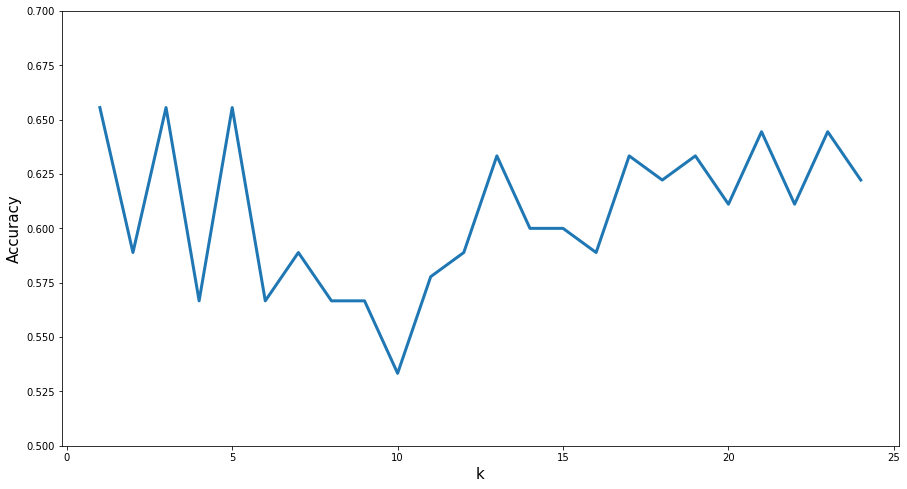

In [207]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))


ax.plot(x,accuracies,'-', linewidth=3)
#ax.plot(x,accuracies,'o')
ax.set_xlabel("k", fontsize = 15)
ax.set_ylabel("Accuracy", fontsize = 15)
ax.set_ylim(0.5,0.7)

plt.savefig("accuracy.png")
